# Lecture 11 - Discriminant Functions, Mixture Models & Expectation-Maximization Algorithm

---

# Discriminant Functions

Classification can also be seen as implementing a set of **discriminant functions**, $g_i(x), i=1,\dots, K$, such that we

$$\text{Choose} \;\; C_i \;\; \text{if} \;\; g_i(x) = \max_k g_k(x)$$

where $g_i(\mathbf{x}) = \ln(P(C_i|\mathbf{x})) = \ln(P(\mathbf{x}|C_i)P(C_i))$.

When there are **two classes** ($C_1$ and $C_2$), we have the **Bayesian decision rule**

\begin{align*}
\text{Choose} \;\; C_1 \;\; \text{if} \;\; & P(C_1|x) > P(C_2|x) \\
\text{Choose} \;\; C_1 \;\; \text{if} \;\; & P(x|C_1)P(C_1) > P(x|C_2)P(C_2)\\
\text{Choose} \;\; C_1 \;\; \text{if} \;\; & \ln(P(x|C_1)P(C_1)) > \ln(P(x|C_2)P(C_2))\\
\text{Choose} \;\; C_1 \;\; \text{if} \;\; & g_1(x) > g_2(x)\\
\text{Choose} \;\; C_1 \;\; \text{if} \;\; & g_1(x)-g_2(x) > 0
\end{align*}


When there are **two classes**, we can define a single discriminant

$$g(\mathbf{x}) = g_1(\mathbf{x}) - g_2(\mathbf{x})$$

and we

$$\text{Choose} \begin{cases}C_1 & \text{if} \; g(\mathbf{x})>0\\ C_2 & \text{otherwise}\end{cases}$$

---

## Exercise 1

Explicitly calculate the decision boundary for the two-class two-dimensional data. Assume that the data likelihood for each class is a bivariate Gaussian distribution

$$P(\mathbf{x}|C_i) = \frac{1}{(2\pi)^{d/2}|\Sigma_i|^{1/2}} \exp\left\{-\frac{1}{2}(\mathbf{x}-\mu_i)^T\Sigma_i^{-1}(\mathbf{x}-\mu_i)\right\}$$

where 

$$\mu_1 =\begin{bmatrix}3\\6\end{bmatrix}, \;\;\; \mu_2 =\begin{bmatrix}3\\-2\end{bmatrix}, \;\;\; \Sigma_1=\begin{bmatrix}1/2 & 0\\0 &2\end{bmatrix}, \;\;\; \Sigma_2=\begin{bmatrix}2 & 0\\0 &2\end{bmatrix}$$

The inverse matrices are

$$\Sigma_1^{-1}=\begin{bmatrix}2 & 0\\0 &1/2\end{bmatrix}, \;\;\; \Sigma_2^{-1}=\begin{bmatrix}1/2 & 0\\0 &1/2\end{bmatrix}$$

Assume equal prior probabilities $P(C_1)=P(C_2)=\frac{1}{2}$.

1. Compute the discriminant function (decision function).

**Answer in board notes.**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import scipy.stats as stats

In [7]:
mu1 = [3, 6]
mu2 = [3, -2]

Sigma1 = np.array([[0.5,0],[0,2]])
Sigma2 = np.array([[2,0],[0,2]])

p1 = 0.5
p2 = 1-p1

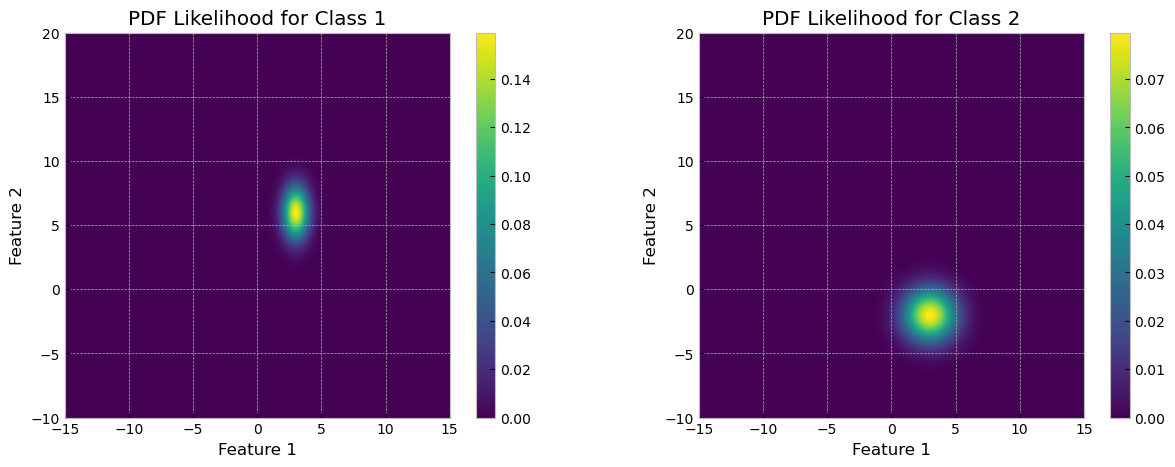

In [8]:
# Compute a grid of values for x and y 
gridx = 15
gridy = 20
x = np.linspace(-gridx, gridx, 500)
y = np.linspace(-10, gridy, 500)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0) # grid of values

# Let's plot the probabaility density function (pdf) for each class
y1 = stats.multivariate_normal.pdf(X, mean=mu1, cov=Sigma1) #P(x|C1) - data likelihood for C1
y2 = stats.multivariate_normal.pdf(X, mean=mu2, cov=Sigma2) #P(x|C2)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(y1, extent=[-gridx,gridx,-10,gridy])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(y2, extent=[-gridx,gridx,-10,gridy])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

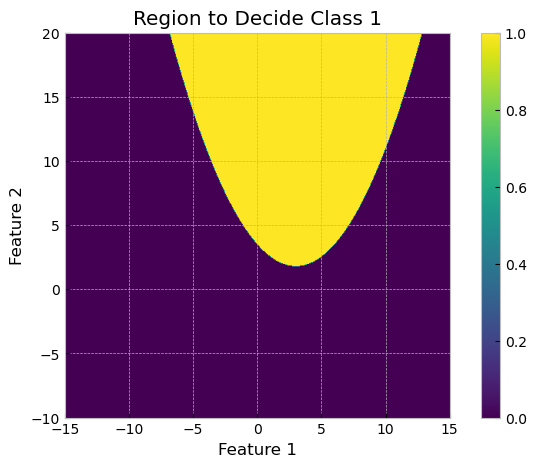

In [9]:
# Let's take a look at the posterior distributions: they represent our classification decision
pos1 = (y1*p1)/(y1*p1 + y2*p2) # P(C1|x) - posterior probability
pos2 = (y2*p2)/(y1*p1 + y2*p2) # P(C2|x)

# Look at the decision boundary:
plt.figure(figsize=(8,5))
plt.imshow(pos1>pos2, extent=[-gridx,gridx,-10,gridy])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Region to Decide Class 1');

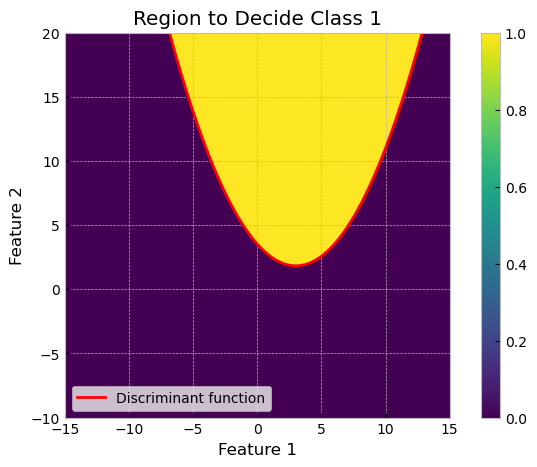

In [10]:
x1 = np.linspace(-6.8,12.8, 100)

plt.figure(figsize=(8,5))
plt.imshow(pos1>pos2, extent=[-gridx,gridx,-10,gridy])
plt.plot(x1, 3.514 - 1.125*x1 + 0.1875*x1**2, 'r', label='Discriminant function')
plt.colorbar(); plt.legend()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Region to Decide Class 1');

---
---
---

# Mixture Models

What if the data for a *single class* looks like the plot below?

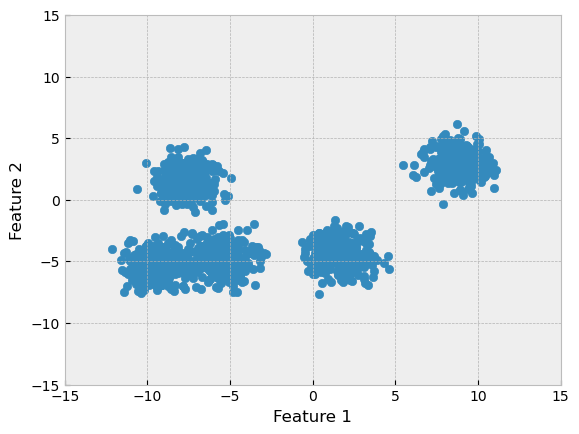

In [15]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples = 1500, centers = 5)

plt.scatter(data[:,0],data[:,1]); plt.axis([-15,15,-15,15])
plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

If we assume a single Gaussian distribution, we would obtain a very poor estimate of the true underlying data likelihood.

We can better represent this data with a **mixture model**:

$$p(x|\Theta) = \sum_{k=1}^K \pi_k P(x|\Theta_k)$$

where $\Theta = \{\Theta_k\}_{k=1}^K$ are set of parameters that define the distributional form in the probabilistic model $P(\bullet|\Theta_k)$ and 

\begin{align*}
0 & \leq \pi_k \leq 1\\
& \sum_k \pi_k = 1
\end{align*}

# Gaussian Mixture Models

A **Gaussian Mixture Model** or **GMM** is a probabilistic model that assumes a data likelihood to be a weighted sum of Gaussian distributions with unknown parameters.

$$p(\mathbf{x}|\Theta) = \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$$

where $\Theta=\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$, $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^K \pi_k = 1$.

* When standard distributions (such as Gamma, Exponential, Gaussian, etc.) are not sufficient to characterize a *complicated* data likelihood, we can instead characterize it as the sum of weighted Gaussians distributions

* Another way that GMMs are most commonly used for is to partition data in subgroups

___